In [ ]:
!pip install gensim==4.2.0
!pip install matplotlib==3.5.3
!pip install prettyprint==0.1.5
!pip install scikit-learn==1.0.2

from pprint import pprint
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn import decomposition
model = api.load("word2vec-google-news-300")

In [10]:
first_5000_words = model.index_to_key[1:5000]

index_ed = []
index_ing = []
requested_words = []

for i, word in enumerate(first_5000_words):
  if word.endswith("ing"):
    requested_words.append(word)
    index_ing.append(len(requested_words) - 1)

  if word.endswith("ed"):
    requested_words.append(word)
    index_ed.append(len(requested_words) - 1)

requested_words_vec=model[requested_words]

In [3]:
pca = decomposition.PCA(n_components=2)
pca.fit(requested_words_vec) 
Z = pca.transform(requested_words_vec) 

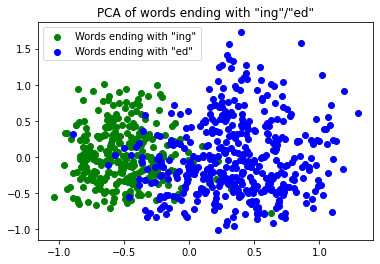

In [21]:
plt.scatter(Z[index_ing, 0],Z[index_ing, 1], color = "green")
plt.scatter(Z[index_ed, 0],Z[index_ed, 1], color = "blue")
plt.title('PCA of words ending with "ing"/"ed"')
plt.legend(['Words ending with "ing"', 'Words ending with "ed"'])

In [37]:
pca.explained_variance_ratio_

array([0.04199325, 0.03410605], dtype=float32)

As seen in Figre, there is a rough desperation between words ending with "ing" and words ending with "ed". By rough I mean: there are words that seems to be words that ending with "ed" which are close to words that ending with "ing" (E.g. in the area around (0,0) in figure). 

Since the variance explained by the first component is $\sim4.2\%$ and the variance explained by the second component is $\sim3.4\%$ than this figure showing only about $\sim7.6\%$ of the variance! Therefore, it is hard to give better than "rough" estimation.

Note, if for example it would be needed for a downstream task t build a classifier that recognized words that ending with "ed" from words that ending with "ing". It would be possible to project given word (ending with "ing"/"ed") to 2-dimensions and to check to witch cluster mean it is closer.